In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import random

Nota: A lo largo de este código, el argumento 'RUTA' debe ser reemplazado por la dirección en donde se encuentren los archivos que se utilizarán

# **Obtención de bases de datos**

La bases de datos se obtuvieron de https://www.gob.mx/salud/documentos/datos-abiertos-bases-historicas-direccion-general-de-epidemiologia
A pesar de contar con registro histórico, los años 2024 y 2023 se encuentran separados por mes, por lo que se concatenaron para trabajar sobre un solo csv anual.
Se usará una técnica análoga para trabajar por olas y para la general.

# **Creación de bases anuales**

In [ ]:
# BASE ANUAL 2024

# Cargar ambos archivos csv en dataframes
db24ene = pd.read_csv('RUTA')
db24feb = pd.read_csv('RUTA')

# Concatenar los dfs eliminando el encabezado
df_concatenado = pd.concat([db24ene, db24feb], ignore_index=True)

# Guardar en un nuevo archivo
df_concatenado.to_csv('COVID_2024.csv', index=False)

In [ ]:
# BASE ANUAL 2023

db23ene = pd.read_csv('RUTA')
db23feb = pd.read_csv('RUTA')
db23mar = pd.read_csv('RUTA')
db23abr = pd.read_csv('RUTA')
db23may = pd.read_csv('RUTA')
db23jun = pd.read_csv('RUTA')
db23jul = pd.read_csv('RUTA')
db23ago = pd.read_csv('RUTA')
db23sep = pd.read_csv('RUTA')
db23oct = pd.read_csv('RUTA')
db23nov = pd.read_csv('RUTA')
db23dic = pd.read_csv('RUTA')

df_concatenado2 = pd.concat([db23ene, db23feb, db23mar, db23abr, db23may, db23jun, db23jul, db23ago, db23sep, db23oct, db23nov, db23dic], ignore_index=True)

df_concatenado2.to_csv('COVID_2023.csv', index=False)

Las bases anuales 2020, 2021 y 2022 ya se encuentran disponibles, por lo que no es necesario crearlas.

In [4]:
df['FECHA_SINTOMAS'] = pd.to_datetime(df['FECHA_SINTOMAS'])

# Encuentra la fecha más antigua
fecha_mas_antigua = df['FECHA_SINTOMAS'].max()

# Muestra el resultado
print("La fecha más antigua es:", fecha_mas_antigua)

La fecha más antigua es: 2023-01-31 00:00:00


# **Análisis de valores nulos y desbalance de clases**

Los datos faltantes están representados con un valor numérico según lo descrito por el diccionario. Para representarlos utilizando la matriz de ausencia, es necesario cambiar dichos valores en cada variable según aplique.

In [ ]:
def reemplazar_a_nulos(df, columnas, valor_a_reemplazar):

    # columnas: Lista de nombres de columna
    # valor_a_reemplazar: Lista de valores que se cambiarán a NaN

    for col in columnas:
        df[col].replace(valor_a_reemplazar, np.nan, inplace=True)

    return df

In [ ]:
# Listas de variables, guiado por el archivo 'Catálogo' del diccionario

columnas_99 = ['SEXO', 'SECTOR', 'TIPO_PACIENTE']
valores_99 = [99]

columnas_98_99 = ['INTUBADO', 'OTRO_CASO', 'UCI', 'INDIGENA']
valores_98_99 = [98, 99]

columnas_97_98_99 = [
    'NEUMONIA', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'CARDIOVASCULAR',
    'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO'
]
valores_97_98_99 = [97, 98, 99]

columnas_entidad = ['ENTIDAD_RES']
valores_entidad = [36, 97, 98, 99]

columnas_municipio = ['MUNICIPIO_RES']
valores_municipio = [999]

In [ ]:
# Ejemplo de uso

nulos_2020 = reemplazar_a_nulos(db2020, columnas_99, valores_99)
nulos_2020 = reemplazar_a_nulos(nulos_2020, columnas_98_99, valores_98_99)
nulos_2020 = reemplazar_a_nulos(nulos_2020, columnas_97_98_99, valores_97_98_99)
nulos_2020 = reemplazar_a_nulos(nulos_2020, columnas_entidad, valores_entidad)
nulos_2020 = reemplazar_a_nulos(nulos_2020, columnas_municipio, valores_municipio)


**Nullity matrix**

In [ ]:
def comparar_datos_faltantes(df):

    msno.matrix(df, figsize=(15, 8), sparkline=False, fontsize=8, labels=True)
    plt.title('Nullity Matrix: BD anual', fontsize=14)
    plt.show()

**Desbalance de clases**

De forma similar, podemos representar con la misma matriz la variable principal que causa un desbalance de clases grave, la cual es **FECHA_DEF**  
Recordando que el valor 9999-99-99 indica que el paciente no falleció, mostremos cuántos registros existen con dicho valor.

In [ ]:
def reemplazar_fecha_a_nulos(df, columnas, valor_a_reemplazar):

    for col in columnas:
        df[col] = df[col].astype(str)
        df[col].replace(valor_a_reemplazar, np.nan, inplace=True)

    return df

In [ ]:
columnas_defuncion = ['FECHA_DEF']
valores_defuncion = ['9999-99-99']

In [ ]:
# Ejemplo de uso

nulo_def_2020 = reemplazar_fecha_a_nulos(db2020, columnas_defuncion, valores_defuncion)

In [ ]:
comparar_datos_faltantes(nulo_def_2020)

**Dendograma**

In [ ]:
def dendrograma(df):

    msno.dendrogram(df)
    plt.title('Dendrograma de datos faltantes', fontsize=14)
    plt.show()

# **Preprocesamiento**

**1. Eliminación de casos no positivos**

Eliminar registros de pacientes no-positivos, esto corresponde a un valor de 4 o superior (hasta 7) en la variable CLASIFICACION_FINAL.
Deseamos hacerlo para todas las bases anuales.

In [ ]:
def eliminar_no_positivos(df):

    # Debug previo
    total_registros = df.shape[0]
    print("Registros antes de filtrar por casos positivos: ", total_registros)

    df = df[df['CLASIFICACION_FINAL'] < 4]

    # Debug posterior
    total_registros_filtrados = df_positivo.shape[0]
    print("Registros luego de filtrar por casos positivos: ", total_registros_filtrados)

    return df

Creación de archivo nuevo para reducir el tamaño y trabajar posteriormente

In [ ]:
df.to_csv('COVID_2020_CONFIRMADOS.csv', index=False)

Análisis de reducción de registros

*Base anual 2020*  
Registros antes de filtrar por casos positivos:  3,868,396  
Registros luego de filtrar por casos positivos:  1,563,135 (40.40%)

*Base anual 2021*  
Registros antes de filtrar por casos positivos:  8,830,345  
Registros luego de filtrar por casos positivos:  2,526,649 (28.61%)

*Base anual 2022*  
Registros antes de filtrar por casos positivos:  6,451,944  
Registros luego de filtrar por casos positivos:  3,195,409 (49.52%)

*Base enero 2023*  
Registros antes de filtrar por casos positivos:  6,669,733  
Registros luego de filtrar por casos positivos:  3,283,180 (49.22%)

*Base febrero 2023*  
Registros antes de filtrar por casos positivos:  6,884,449  
Registros luego de filtrar por casos positivos:  3,365,985 (48.89%)

*Base marzo 2023*  
Registros antes de filtrar por casos positivos:  7,070,534  
Registros luego de filtrar por casos positivos:  3,441,901 (48.67%)

*Base abril 2023*  
Registros antes de filtrar por casos positivos:  7,205,138  
Registros luego de filtrar por casos positivos:  3,489,417 (48.42%)

*Base mayo 2023*  
Registros antes de filtrar por casos positivos:  7,345,960  
Registros luego de filtrar por casos positivos:  3,530,121 (48.05%)

*Base junio 2023*  
Registros antes de filtrar por casos positivos:  954,148  
Registros luego de filtrar por casos positivos:  348,924 (36.56%)

*Base julio 2023*  
Registros antes de filtrar por casos positivos:  996,403  
Registros luego de filtrar por casos positivos:  360,525 (36.18%)

*Base agosto 2023*  
Registros antes de filtrar por casos positivos:  1,070,214  
Registros luego de filtrar por casos positivos:  391,292 (36.56%)

*Base septiembre 2023*  
Registros antes de filtrar por casos positivos:  1,155,416  
Registros luego de filtrar por casos positivos:  423,632 (36.66%)

*Base octubre 2023*  
Registros antes de filtrar por casos positivos:  1,183,124  
Registros luego de filtrar por casos positivos:  427,377 (36.12%)

*Base noviembre 2023*  
Registros antes de filtrar por casos positivos:  1,199,527  
Registros luego de filtrar por casos positivos:  427,756 (35.66%)

*Base diciembre de 2023*  
Registros antes de filtrar por casos positivos:  1,216,831  
Registros luego de filtrar por casos positivos:  428,177 (35.18%)

*Base anual 2023*  
Registros antes de filtrar por casos positivos:  42,951,477  
Registros luego de filtrar por casos positivos:  19,918,287 (46.37%)

Base anual 2024 (enero-febrero)  
Registros antes de filtrar por casos positivos:  2,486,160  
Registros luego de filtrar por casos positivos:  859,334 (34.56%)

**2. Selección de variables y acciones individuales**

Seleccionar las variables de interés para este trabajo, eliminación de registros y cambios de valores según aplique. La siguiente información se encuentra en *diccionario_datos_covid19*

La variables seleccionadas son:

1.   **SECTOR**: Identifica el tipo de institución del Sistema Nacional de Salud que brindó la atención. Tipo: int ([1-13], 99)
Se desea eliminar registros con 99 ("no especificado")
2.   **SEXO**: Identifica al sexo del paciente. Tipo: int (1-mujer, 2-hombre, 99-no especificado)
Eliminar registros con 99
3.   **ENTIDAD_RES**: Identifica la entidad de residencia del paciente. Tipo: int ([01-32], 36, 97, 98, 99)
Eliminar registros con 36 ("República Mexicana"), 97 ("no aplica"), 98 ("se ignora") y 99 ("no especificado")
4.   **MUNICIPIO_RES**: Identifica la entidad de residencia del paciente. Tipo: int (clave por municipio)
Eliminar registros con 999 ("no especificado")
5.   **TIPO_PACIENTE**: Identifica el tipo de atención que recibió el paciente en la unidad. Ambulatorio (regresó a casa) u hospitalizado. Tipo: int (1-ambulatorio, 2-hospitalizado, 99-no especificado)
Eliminar registros con 99
6.   **FECHA_SINTOMAS**: Identiifica la fecha en que inició la sintomatología del paciente. Tipo: string con formato AAAA-MM-DD
Se verificó que no existieran registros nulos
7.   **FECHA_DEF**: Identifica la fecha en que el paciente falleció. Tipo: string con formato AAAA-MM-DD
Se identificó que 9999-99-99 funge como ("no aplica")
8.   **INTUBADO**: Identifica si el paciente requirió de intubación. Tipo: int (1-si, 2-no, 97-no aplica, 98-se ignora, 99-no especificado)
Se cambiará cada instancia de 97 por 2, eliminar registros con 98 y 99
9.   **NEUMONIA**: Identifica si al paciente se le diagnosticó con neumonía. Tipo: int (1-si, 2-no, 97-no aplica, 98-se ignora, 99-no especificado)
Eliminar registros con 97, 98 y 99.
10.   **EDAD**: Identifica la edad del paciente. Tipo: int
Se aceptan registros con valor 0
11.   **DIABETES**: Identifica si el paciente tiene un diagnóstico de diabetes. Tipo: int (1-si, 2-no, 97-no aplica, 98-se ignora, 99-no especificado)
Eliminar registros con 97, 98 y 99.
12.   **EPOC**: Identifica si el paciente tiene un diagnóstico de EPOC. Tipo: int (1-si, 2-no, 97-no aplica, 98-se ignora, 99-no especificado)
Eliminar registros con 97, 98 y 99.
13.   **ASMA**: Identifica si el paciente tiene un diagnóstico de asma. Tipo: int (1-si, 2-no, 97-no aplica, 98-se ignora, 99-no especificado)
Eliminar registros con 97, 98 y 99.
14.   **INMUSUPR**: Identifica si el paciente presenta inmunosupresión. Tipo: int (1-si, 2-no, 97-no aplica, 98-se ignora, 99-no especificado)
Eliminar registros con 97, 98 y 99.
15.   **HIPERTENSION**: Identifica si el paciente tiene un diagnóstico de hipertensión.
Eliminar registros con 97, 98 y 99.
16.   **CARDIOVASCULAR**: Identifica si el paciente tiene un diagnóstico de enfermedades cardiovasculares.
Eliminar registros con 97, 98 y 99.
17.   **OBESIDAD**: Identifica si el paciente tiene diagnóstico de obesidad.
Eliminar registros con 97, 98 y 99.
18.   **RENAL_CRONICA**: Identifica si el paciente tiene diagnóstico de insuficiencia renal crónica.
Eliminar registros con 97, 98 y 99.
19.   **TABAQUISMO**: Identifica si el paciente tiene hábito de tabaquismo.
Eliminar registros con 97, 98 y 99.
20.   **OTRO_CASO**: Identifica si el paciente tuvo contacto con algún otro caso diagnósticado con SARS CoV-2
Se cambiará cada instancia de 97 por 2, eliminar registros con 98 y 99.
21.   **CLASIFICACION_FINAL**: Identifica si el paciente es un caso de COVID-19 según el catálogo "CLASIFICACION_FINAL". Tipo: int ([1-3]-positivo, [4-7]-negativo)
Utilizada como primer filtro para casos positivos
22.   **UCI**: Identifica si el paciente requirió ingresar a una Unidad de Cuidados Intensivos. Tipo: int (1-si, 2-no, 97-no aplica, 98-se ignora, 99-no especificado)
Se cambiará cada instancia de 97 por 2, eliminar registros con 98 y 99.




In [ ]:
# Selección de variables a conservar

variables_elegidas = ['SECTOR', 'SEXO', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
                       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
                       'EDAD', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR',
                       'HIPERTENSION', 'CARDIOVASCULAR', 'OBESIDAD',
                       'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'UCI']

In [ ]:
def reducir_variables(df, variables):

    # variables: lista de columnas seleccionadas

    df_reducido = df.loc[:, variables].copy()
    return df_reducido

Eliminación de registros con valores indeseables

In [ ]:
def limpieza_registros(df):

    print("Número de registros antes del preprocesamiento:", len(df))

    remover_99 = ['SEXO', 'SECTOR', 'TIPO_PACIENTE']
    for col in remover_99:
        df = df[df[col] != 99]

    remover_98_99 = ['INTUBADO', 'OTRO_CASO', 'UCI']
    for col in remover_98_99:
        df = df[~df[col].isin([98, 99])]

    remover_97_98_99 = ['NEUMONIA', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION',
                       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO']
    for col in remover_97_98_99:
        df = df[~df[col].isin([97, 98, 99])]

    df = df[~df['ENTIDAD_RES'].isin([36, 97, 98, 99])]

    df = df[df['MUNICIPIO_RES'] != 999]

    reemplazar_97 = ['INTUBADO', 'OTRO_CASO', 'UCI']
    for col in reemplazar_97:
        df[col] = df[col].replace(97, 2)

    print("Número de registros después del preprocesamiento:", len(df))

    return df

In [ ]:
# Ejemplo de uso

db_var_red = reducir_variables(db2020_positivos, variables_elegidas)
db_reducida = limpieza_registros(db_var_red)
db_reducida.to_csv('COVID_2020_CONFIRMADOS_REDUCIDA')

# **3. Ingeniería de variables**

**3.1. Rangos de edad**

Se toma como referencia los rangos de edad proporcionados por la información general de Covid-19 en México
https://datos.covid-19.conacyt.mx/

En vez de rangos de edad cada 5 años, se consideran 10.

In [11]:
def agregar_variables_edad(df):

    # Definir los rangos de edad

    df['0_9'] = (df['EDAD'] >= 0) & (df['EDAD'] <= 9)
    df['10_19'] = (df['EDAD'] >= 10) & (df['EDAD'] <= 19)
    df['20_29'] = (df['EDAD'] >= 20) & (df['EDAD'] <= 49)
    df['30_39'] = (df['EDAD'] >= 30) & (df['EDAD'] <= 39)
    df['40_49'] = (df['EDAD'] >= 40) & (df['EDAD'] <= 49)
    df['50_59'] = (df['EDAD'] >= 50) & (df['EDAD'] <= 59)
    df['60_69'] = (df['EDAD'] >= 60) & (df['EDAD'] <= 69)
    df['70_MAS'] = (df['EDAD'] >= 70)

    # Convertir los booleanos a enteros

    df['0_9'] = df['0_9'].astype(int)
    df['10_19'] = df['10_19'].astype(int)
    df['20_29'] = df['20_29'].astype(int)
    df['30_39'] = df['30_39'].astype(int)
    df['40_49'] = df['40_49'].astype(int)
    df['50_59'] = df['50_59'].astype(int)
    df['60_69'] = df['60_69'].astype(int)
    df['70_MAS'] = df['70_MAS'].astype(int)

    return df

**3.2. Asignación de valores de IDH por municipio**

La información obtenida está actualizada al último valor publicado por el programa de las Naciones Unidad para el Desarrollo (PNUD) en México.

Recurso: https://drive.google.com/drive/folders/1GRxyxSIPAL629vOnMLsLZgX70iqVo5ZX  
Informe: https://mexico.un.org/sites/default/files/2023-02/INFORME_PNUD_2022_electronico-Portadas-compressed.pdf

Para lo cual fue necesario crear una variable llamada **CLAVE_RES** que unifica las variables **ENTIDAD_RES** y **MUNICIPIO_RES** en ese orden, para así asignar en una nueva variable **IDH_VALOR** tal y como lo provee esta institución.

In [ ]:
# Leer el archivo de Excel con CLAVE_MUNICIPIO e IDH_2020

idh_datos = pd.read_excel('Resultados_IDH.xlsx', names=['CLAVE_MUNICIPIO', 'IDH_2020'], skiprows=0)

In [12]:
def generar_clave_res(df):

    # Convertir las columnas a string y rellenar con ceros a la izquierda si es necesario

    df['ENTIDAD_RES'] = df['ENTIDAD_RES'].astype(str).str.zfill(2)  # Asegura que 'ENTIDAD_RES' tenga 2 dígitos
    df['MUNICIPIO_RES'] = df['MUNICIPIO_RES'].astype(str).str.zfill(3)  # Asegura que 'MUNICIPIO_RES' tenga 3 dígitos

    # Concatenar las dos columnas para crear 'CLAVE_RES'

    df['CLAVE_RES'] = df['ENTIDAD_RES'] + df['MUNICIPIO_RES']

    return df

In [ ]:
def agregar_idh_valor(df, idh_datos):

    # Asegurarse de que las columnas sean del tipo string de largo 5

    df['CLAVE_RES'] = df['CLAVE_RES'].astype(str).str.zfill(5).str.strip()
    idh_datos['CLAVE_MUNICIPIO'] = idh_datos['CLAVE_MUNICIPIO'].astype(str).str.zfill(5).str.strip()

    # Verificar los tipos de datos antes del merge

    print("Tipo de dato de CLAVE_RES:", df['CLAVE_RES'].dtype)
    print("Tipo de dato de CLAVE_MUNICIPIO:", idh_datos['CLAVE_MUNICIPIO'].dtype)

    # Realizar el merge utilizando CLAVE_RES y CLAVE_MUNICIPIO

    df_con_idh = df.merge(idh_datos, left_on='CLAVE_RES', right_on='CLAVE_MUNICIPIO', how='left')

    # Renombrar la columna IDH_2020 a IDH_VALOR

    df_con_idh.rename(columns={'IDH_2020': 'IDH_VALOR'}, inplace=True)

    # Eliminar la columna CLAVE_MUNICIPIO del merge

    df_con_idh.drop(columns=['CLAVE_MUNICIPIO'], inplace=True)

    # Número de registros antes de eliminar

    registros_antes = len(df_con_idh)
    print(f"Número de registros antes de eliminar NaN en IDH_VALOR: {registros_antes}")

    # Revisar los registros que resultaron en NaN

    claves_nan = df_con_idh[df_con_idh['IDH_VALOR'].isna()]['CLAVE_RES']
    print("Claves RES sin IDH_VALOR asignado:")
    print(claves_nan)

    if not claves_nan.empty:
        # Verificar claves problemáticas en el archivo IDH
        claves_en_idh = idh_datos[idh_datos['CLAVE_MUNICIPIO'].isin(claves_nan)]
        print("Claves presentes en el archivo de IDH:")
        print(claves_en_idh)

    # Eliminar registros que tienen NaN en IDH_VALOR

    df_con_idh = df_con_idh.dropna(subset=['IDH_VALOR'])

    # Número de registros después de eliminar

    registros_despues = len(df_con_idh)
    print(f"Número de registros después de eliminar NaN en IDH_VALOR: {registros_despues}")

    # Verificar si hay algún NaN en la columna IDH_VALOR

    if df_con_idh['IDH_VALOR'].isna().sum() == 0:
        print("Todos los registros en el dataframe tienen valores en IDH_VALOR.")
    else:
        print("Algunos registros todavía tienen NaN en IDH_VALOR.")

    return df_con_idh

In [ ]:
def confirmar_no_nulos(df):

    registros_antes = len(df)
    print(f"Registros antes de eliminar NaN: {registros_antes}")

    df = df.dropna(subset=['IDH_VALOR'])

    registros_despues = len(df)
    print(f"Registros después de eliminar NaN: {registros_despues}")

    return df

Posteriormente, se crearon rangos para este valor, cuyas variables son:

*   **IDH_MUY_BAJO** Intervalo de [0, 0.7)
*   **IDH_BAJO** Intervalo de [0.7, 0.75)
*   **IDH_MEDIO** Intervalo de [0.75, 0.8)
*   **IDH_MED_ALTO** Intervalo de [0.8, 0.825)
*   **IDH_ALTO** Intervalo de [0.825, 0.85)
*   **IDH_MUY_ALTO** Intervalo de [0.85, 1]

In [ ]:
def asignar_rango_idh(df):

    # Convertir la columna a tipo numérico

    df['IDH_VALOR'] = pd.to_numeric(df['IDH_VALOR'], errors='coerce')

    # Definir los rangos de IDH

    df['IDH_MUY_BAJO'] = (df['IDH_VALOR'] >= 0) & (df['IDH_VALOR'] < 0.7)
    df['IDH_BAJO'] = (df['IDH_VALOR'] >= 0.7) & (df['IDH_VALOR'] < 0.75)
    df['IDH_MEDIO'] = (df['IDH_VALOR'] >= 0.75) & (df['IDH_VALOR'] < 0.8)
    df['IDH_MED_ALTO'] = (df['IDH_VALOR'] >= 0.8) & (df['IDH_VALOR'] < 0.825)
    df['IDH_ALTO'] = (df['IDH_VALOR'] >= 0.825) & (df['IDH_VALOR'] < 0.85)
    df['IDH_MUY_ALTO'] = (df['IDH_VALOR'] >= 0.85) & (df['IDH_VALOR'] <= 1)

    # Convertir los booleanos a enteros

    df['IDH_MUY_BAJO'] = df['IDH_MUY_BAJO'].astype(int)
    df['IDH_BAJO'] = df['IDH_BAJO'].astype(int)
    df['IDH_MEDIO'] = df['IDH_MEDIO'].astype(int)
    df['IDH_MED_ALTO'] = df['IDH_MED_ALTO'].astype(int)
    df['IDH_ALTO'] = df['IDH_ALTO'].astype(int)
    df['IDH_MUY_ALTO'] = df['IDH_MUY_ALTO'].astype(int)

    return df

**3.3. Creación de variables por sector de salud**

Se agruparon las unidades médicas de atención por demanda en las variables:

*   **UM_IMSS**
*   **UM_ISSTE**
*   **UM_MILITAR** Incluye a las UMs de SEMAR y SEDENA
*   **UM_PRIVADA** Intervalo de [0.8, 0.825)
*   **UM_SSA** Intervalo de [0.825, 0.85)
*   **UM_OTRAS** Incluye a las UMs con menor incidencia: PEMEX, IMSS Bienestar (no incluída en UM_IMSS por ser el antiguo Seguro Popular), Hospital Estatal, Hospital Municipal, Cruz Roja, Hospital Universitario y DIF



In [13]:
def generar_variables_sector(df):

    df['UM_IMSS'] = (df['SECTOR'] == 4).astype(int)
    df['UM_ISSTE'] = (df['SECTOR'] == 6).astype(int)
    df['UM_MILITAR'] = ((df['SECTOR'] == 10) | (df['SECTOR'] == 11)).astype(int)
    df['UM_PRIVADA'] = (df['SECTOR'] == 9).astype(int)
    df['UM_SSA'] = (df['SECTOR'] == 12).astype(int)
    df['UM_OTRAS'] = ((df['SECTOR'] == 1) | (df['SECTOR'] == 2) |
                      (df['SECTOR'] == 3) | (df['SECTOR'] == 5) |
                      (df['SECTOR'] == 7) | (df['SECTOR'] == 8) |
                      (df['SECTOR'] == 13)).astype(int)

    return df

**3.4. Creación de la variable objetivo**

La variable que buscaremos predecir será llamada **DEFUNCION**, la cual toma un valor de 1 cuando FECHA_DEF tiene cualquier otro valor que no sea '9999-99-99', ya que esto corresponde a la fecha del deceso de un paciente

In [14]:
def generar_variable_defuncion(df):

    df['DEFUNCION'] = (df['FECHA_DEF'] != '9999-99-99').astype(int)

    return df

**3.5. Eliminación de variables en desuso**

In [15]:
def drop_final(df):

    columnas_a_eliminar = ['ENTIDAD_RES', 'MUNICIPIO_RES', 'EDAD', 'SECTOR', 'FECHA_DEF']

    # Eliminar las columnas
    df = df.drop(columns=columnas_a_eliminar, errors='ignore')

    return df

3.6. Binarización de variables

Con el fin de preparar las bases para la entrada a los modelos, las variables se binarizaron de la siguiente forma:

*  **SEXO**: 1 (mujer) 0 (no mujer)
*  **TIPO_PACIENTE**: 1 (no hospitalizado) 0 (hospitalizado)
*  **INTUBADO**: 1 (si) 0 (no)
*  **NEUMONIA**: 1 (si) 0 (no)
*  **DIABETES**: 1 (si) 0 (no)
*  **EPOC**: 1 (si) 0 (no)
*  **ASMA**: 1 (si) 0 (no)
*  **INMUSUPR**: 1 (si) 0 (no)
*  **HIPERTENSION**: 1 (si) 0 (no)
*  **CARDIOVASCULAR**: 1 (si) 0 (no)
*  **OBESIDAD**: 1 (si) 0 (no)
*  **RENAL_CRONICA**: 1 (si) 0 (no)
*  **TABAQUISMO**: 1 (si) 0 (no)
*  **OTRO_CASO**: 1 (si) 0 (no)
*  **UCI**: 1 (si) 0 (no)

In [16]:
def binarizar_variables(df):

    var_a_binarizar = [
        'SEXO', 'TIPO_PACIENTE', 'INTUBADO', 'NEUMONIA', 'DIABETES',
        'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'CARDIOVASCULAR',
        'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'UCI'
    ]

    df[var_a_binarizar] = df[var_a_binarizar].replace(2, 0).astype(int)

    return df

Ejemplo de uso

In [ ]:
# 1. Rangos de edad
df_ingenieria_var = agregar_variables_edad (db2023_positivos_reducida)

# 2. Generar claves de residencia
df_con_claves = generar_clave_res (df_ingenieria_var)

# 3. IDH por entidad
idh_datos = pd.read_excel ('Resultados_IDH.xlsx', names=['CLAVE_MUNICIPIO', 'IDH_2020'], skiprows=0)
df_idh_val = agregar_idh_valor (df_con_claves, idh_datos)

# 4. Rangos de IDH
df_idh_rango = asignar_rango_idh (df_idh_val)

# 5. Variables de sector de atención
df_sector = generar_variables_sector (df_idh_rango)

# 6. Variable objetivo
df_defuncion = generar_variable_defuncion (df_sector)

# 7. Drop de siguientes variables en desuso
df_drop = drop_final (df_defuncion)

# 8. Binarización
df_binarizada = binarizar_variables (df_drop)

# 9. No-nulidad en IDH
df_idh_no_nulo = confirmar_no_nulos (df_binarizada)

# df_idh_no_nulo es el df resultante de la ingeniería de características

# **Delimitación por olas y etapas de vacunación**


La inclusión de pacientes en estos periodos temporales se hizo en referencia a la variable **FECHA_SINTOMAS**.

Se utilizó información oficial proporcionada por la Secretaría de Salud para la delimitación por olas según la fecha
https://epidemiologia.salud.gob.mx/gobmx/salud/documentos/covid19/Info-04-23-Int_COVID-19.pdf  
Archivo más reciente subido en febrero de 2024 a la página:
https://coronavirus.gob.mx/analisis-situacional-de-la-epidemia-en-mexico/

*  1ª ola: SE 8 a SE 39 de 2020 (16 de febrero a 26 de septiembre de 2020)
*  2ª ola: SE 40 de 2020 a SE 15 de 2021 (27 de septiembre de 2020 a 17 de abril de 2021)
*  3ª ola: SE 23 a SE 42 de 2021 (6 de junio a 23 de octubre de 2021)
*  4ª ola: SE 51 de 2021 a la SE 9 de 2022 (19 de diciembre de 2021 a 5 de marzo de 2022)
*  5ª ola COVID-19: SE 22 de 2022 a la SE 33 de 2022 (29 de mayo a 20 de agosto de 2022)
*  6ª ola COVID-19: SE 49 de 2022 a la SE 4 de 2023 (4 de diciembre de 2022 a 28 de enero de 2023)

(SE: Semana Epidemiológica)

No se encuentra información oficial sobre la existencia de olas posteriores.

**Por olas**

In [57]:
db2020 = pd.read_csv('Bases_Test_Agua/BASE_2020_COASTAL.csv')

In [58]:
db2021 = pd.read_csv('Bases_Test_Agua/BASE_2021_COASTAL.csv')
db2022 = pd.read_csv('Bases_Test_Agua/BASE_2022_COASTAL.csv')
db2023 = pd.read_csv('Bases_Test_Agua/BASE_2023_COASTAL.csv')

In [59]:
# Fechas de inicio/fin de cada ola

ola_1_inicio = '2020-02-16'
ola_1_fin = '2020-09-26'

ola_2_inicio = '2020-09-27'
ola_2_fin = '2021-04-17'

ola_3_inicio = '2021-06-06'
ola_3_fin = '2021-10-23'

ola_4_inicio = '2021-12-19'
ola_4_fin = '2022-03-05'

ola_5_inicio = '2022-05-29'
ola_5_fin = '2022-08-20'

ola_6_inicio = '2022-12-04'
ola_6_fin = '2023-01-28'

# División por olas (algunas requieren unir dos bd anuales distintas)

ola_1 = db2020[(db2020['FECHA_SINTOMAS'] >= ola_1_inicio) & (db2020['FECHA_SINTOMAS'] <= ola_1_fin)]

ola_2_db_1 = db2020[(db2020['FECHA_SINTOMAS'] >= ola_2_inicio)]
ola_2_db_2 = db2021[(db2021['FECHA_SINTOMAS'] <= ola_2_fin)]
ola_2 = pd.concat([ola_2_db_1, ola_2_db_2])

ola_3 = db2021[(db2021['FECHA_SINTOMAS'] >= ola_3_inicio) & (db2021['FECHA_SINTOMAS'] <= ola_3_fin)]

ola_4_db_1 = db2021[(db2021['FECHA_SINTOMAS'] >= ola_4_inicio)]
ola_4_db_2 = db2022[(db2022['FECHA_SINTOMAS'] <= ola_4_fin)]
ola_4 = pd.concat([ola_4_db_1, ola_4_db_2])

ola_5 = db2022[(db2022['FECHA_SINTOMAS'] >= ola_5_inicio) & (db2022['FECHA_SINTOMAS'] <= ola_5_fin)]

ola_6_db_1 = db2022[(db2022['FECHA_SINTOMAS'] >= ola_6_inicio)]
ola_6_db_2 = db2023[(db2023['FECHA_SINTOMAS'] <= ola_6_fin)]
ola_6 = pd.concat([ola_4_db_1, ola_4_db_2])

In [60]:
ola_1.to_csv('OLA_1_COASTAL.csv', index=False)
ola_2.to_csv('OLA_2_COASTAL.csv', index=False)
ola_3.to_csv('OLA_3_COASTAL.csv', index=False)
ola_4.to_csv('OLA_4_COASTAL.csv', index=False)
ola_5.to_csv('OLA_5_COASTAL.csv', index=False)
ola_6.to_csv('OLA_6_COASTAL.csv', index=False)

**Por etapas de vacunación**

In [ ]:
# Fechas de inicio/fin de cada etapa

etapa_1_inicio = '2020-12-24'
etapa_1_fin = '2021-02-14'

etapa_2_inicio = '2021-02-15'
etapa_2_fin = '2021-05-15'

etapa_3_inicio = '2021-05-16'
etapa_3_fin = '2021-06-15'

etapa_4_inicio = '2021-06-16'
etapa_4_fin = '2021-07-15'

etapa_5_inicio = '2021-07-16'
etapa_5_fin = '2022-03-31'

# División por etapas (algunas requieren unir dos bd anuales distintas)

etapa_1_db_1 = db2020[(db2020['FECHA_SINTOMAS'] >= etapa_1_inicio)]
etapa_1_db_2 = db2021[(db2021['FECHA_SINTOMAS'] <= etapa_1_fin)]
etapa_1 = pd.concat([etapa_1_db_1, etapa_1_db_2])

etapa_2 = db2021[(db2021['FECHA_SINTOMAS'] >= etapa_2_inicio) & (db2021['FECHA_SINTOMAS'] <= etapa_2_fin)]

etapa_3 = db2021[(db2021['FECHA_SINTOMAS'] >= etapa_3_inicio) & (db2021['FECHA_SINTOMAS'] <= etapa_3_fin)]

etapa_4 = db2021[(db2021['FECHA_SINTOMAS'] >= etapa_4_inicio) & (db2021['FECHA_SINTOMAS'] <= etapa_4_fin)]

etapa_5_db_1 = db2021[(db2021['FECHA_SINTOMAS'] >= etapa_5_inicio)]
etapa_5_db_2 = db2022[(db2022['FECHA_SINTOMAS'] <= etapa_5_fin)]
etapa_5 = pd.concat([etapa_5_db_1, etapa_5_db_2])

# **Segunda etapa de ingeniería de variables**

Se propuso incluir los subíndices de Salud (SS) e ingreso (SI) que componen el valor de IDH, además de realizar un ajuste en la consideración del IDH para municipios de Oaxaca; este ajuste es debido a que en 2020, según informa la PNUD, no fue posible obtener dichos valores a nivel municipal. Sin embargo, se presenta en su Informe (página 99) un análisis estadístico para el IDH, Índice de Educación, Índice de Salud e Índice de Ingreso, en donde se observan promedios estatales de cada uno de ellos.

Para Oaxaca:


*   IDH: 0.678
*   SS: 0.783
*   SI: 0.683
*   SE: 0.586

Dada esta información, y notando que efectivamente municipios de Oaxaca no cuentan con información sobre IDH (representado como "ND" o estando ausente en el documento de Resultados), se inputará el valor promedio del estado.



In [ ]:
# Leer el archivo de Excel con CLAVE_MUNICIPIO, IDH_2020, SS_2020, SI_2020 y SE_2020

indices_datos = pd.read_excel('Resultados_IDH_SS_SI.xlsx', names=['CLAVE_MUNICIPIO', 'IDH_2020', 'SS_2020', 'SI_2020', 'SE_2020'], skiprows=0)

In [32]:
def agregar_valores_indices(df, indices_datos):

    # Asegurar que las columnas sean tipo string de largo 5

    df['CLAVE_RES'] = df['CLAVE_RES'].astype(str).str.zfill(5).str.strip()
    indices_datos['CLAVE_MUNICIPIO'] = indices_datos['CLAVE_MUNICIPIO'].astype(str).str.zfill(5).str.strip()

    # Verificar los tipos de datos antes del merge

    print("Tipo de dato de CLAVE_RES:", df['CLAVE_RES'].dtype)
    print("Tipo de dato de CLAVE_MUNICIPIO:", indices_datos['CLAVE_MUNICIPIO'].dtype)
    print("Tipo de dato de IDH_2020:", indices_datos['IDH_2020'].dtype)
    print("Tipo de dato de SS_2020:", indices_datos['SS_2020'].dtype)
    print("Tipo de dato de SI_2020:", indices_datos['SI_2020'].dtype)

    # Realizar el merge utilizando CLAVE_RES y CLAVE_MUNICIPIO

    df_con_indices = df.merge(indices_datos, left_on='CLAVE_RES', right_on='CLAVE_MUNICIPIO', how='left')

    # Renombrar las columnas

    df_con_indices.rename(columns={'IDH_2020': 'IDH_VALOR', 'SS_2020': 'SS_VALOR',
                                   'SI_2020': 'SI_VALOR', 'SE_2020': 'SE_VALOR'}, inplace=True)

    # Eliminar la columna CLAVE_MUNICIPIO del merge

    df_con_indices.drop(columns=['CLAVE_MUNICIPIO'], inplace=True)

    # Analizar NaN en la columna IDH_VALOR

    nan_idh = df_con_indices[df_con_indices['IDH_VALOR'].isna()]
    claves_nan_idh = nan_idh['CLAVE_RES']
    print(f"Registros con NaN en IDH_VALOR: {len(claves_nan_idh)}")
    if not claves_nan_idh.empty:
        print("Claves RES con NaN en IDH_VALOR:")
        print(claves_nan_idh)
        comienzan_con_20_idh = claves_nan_idh.str.startswith('20')
        # Imputar 0.678 en IDH_VALOR para claves que comienzan con '20'
        df_con_indices.loc[df_con_indices['CLAVE_RES'].isin(claves_nan_idh[comienzan_con_20_idh]), 'IDH_VALOR'] = 0.678
        # Eliminar registros donde la clave no comienza con '20'
        df_con_indices = df_con_indices[~df_con_indices['CLAVE_RES'].isin(claves_nan_idh[~comienzan_con_20_idh])]

    # Analizar NaN en la columna SS_VALOR

    nan_ss = df_con_indices[df_con_indices['SS_VALOR'].isna()]
    claves_nan_ss = nan_ss['CLAVE_RES']
    print(f"\nRegistros con NaN en SS_VALOR: {len(claves_nan_ss)}")
    if not claves_nan_ss.empty:
        print("Claves RES con NaN en SS_VALOR:")
        print(claves_nan_ss)
        comienzan_con_20_ss = claves_nan_ss.str.startswith('20')
        # Imputar 0.783 en SS_VALOR para claves que comienzan con '20'
        df_con_indices.loc[df_con_indices['CLAVE_RES'].isin(claves_nan_ss[comienzan_con_20_ss]), 'SS_VALOR'] = 0.783
        # Eliminar registros donde la clave no comienza con '20'
        df_con_indices = df_con_indices[~df_con_indices['CLAVE_RES'].isin(claves_nan_ss[~comienzan_con_20_ss])]

    # Analizar NaN en la columna SI_VALOR

    nan_si = df_con_indices[df_con_indices['SI_VALOR'].isna()]
    claves_nan_si = nan_si['CLAVE_RES']
    print(f"\nRegistros con NaN en SI_VALOR: {len(claves_nan_si)}")
    if not claves_nan_si.empty:
        print("Claves RES con NaN en SI_VALOR:")
        print(claves_nan_si)
        comienzan_con_20_si = claves_nan_si.str.startswith('20')
        # Imputar 0.683 en SI_VALOR para claves que comienzan con '20'
        df_con_indices.loc[df_con_indices['CLAVE_RES'].isin(claves_nan_si[comienzan_con_20_si]), 'SI_VALOR'] = 0.683
        # Eliminar registros donde la clave no comienza con '20'
        df_con_indices = df_con_indices[~df_con_indices['CLAVE_RES'].isin(claves_nan_si[~comienzan_con_20_si])]


    # Analizar NaN en la columna SE_VALOR

    nan_se = df_con_indices[df_con_indices['SE_VALOR'].isna()]
    claves_nan_se = nan_se['CLAVE_RES']
    print(f"Registros con NaN en SE_VALOR: {len(claves_nan_se)}")
    if not claves_nan_se.empty:
        print("Claves RES con NaN en SE_VALOR:")
        print(claves_nan_se)
        comienzan_con_20_se = claves_nan_se.str.startswith('20')
        # Imputar 0.586 en SE_VALOR para claves que comienzan con '20'
        df_con_indices.loc[df_con_indices['CLAVE_RES'].isin(claves_nan_se[comienzan_con_20_se]), 'SE_VALOR'] = 0.586
        # Eliminar registros donde la clave no comienza con '20'
        df_con_indices = df_con_indices[~df_con_indices['CLAVE_RES'].isin(claves_nan_se[~comienzan_con_20_se])]


    return df_con_indices

**Rangos de clasificación de índices socioeconómicos**

Asignación en referencia al informe de la PNUD, presente en la página 56 que indica:

*   Nivel bajo: menos de 0.55
*   Nivel medio: entre 0.55 y 0.7
*   Nivel alto: entre 0.7 y 0.8
*   Nivel muy alto: mayor a 0.8

Toma relevancia debido al análisis de este Progama sobre la movilidad en cada subíndice que hubo en México de 2015 (penúltimo informe) a 2020 (último informe)

Por esto, IDH, SS y SI tendrán los mismos rangos para cada caso.

**Rangos según Informe PNUD 2022 (página 56)**

In [18]:
def asignar_rangos_pnud(df, indice_seleccionado):

    # Convertir la columna a tipo numérico

    df[indice_seleccionado] = pd.to_numeric(df[indice_seleccionado], errors='coerce')

    # Extraer el prefijo adecuado (IDH, SS, SI)

    if 'IDH' in indice_seleccionado:
        prefijo = 'IDH'
    elif 'SS' in indice_seleccionado:
        prefijo = 'SS'
    elif 'SI' in indice_seleccionado:
        prefijo = 'SI'
    elif 'SE' in indice_seleccionado:
        prefijo = 'SE'
    else:
        raise ValueError("El índice seleccionado no coincide con IDH, SS, o SI")

    # Definir los rangos del informe de la PNUD

    df[f'{prefijo}_BAJO'] = (df[indice_seleccionado] < 0.55)
    df[f'{prefijo}_MEDIO'] = (df[indice_seleccionado] >= 0.55) & (df[indice_seleccionado] < 0.7)
    df[f'{prefijo}_ALTO'] = (df[indice_seleccionado] >= 0.7) & (df[indice_seleccionado] < 0.8)
    df[f'{prefijo}_MUY_ALTO'] = (df[indice_seleccionado] >= 0.8)

    # Convertir los booleanos a enteros
    
    df[f'{prefijo}_BAJO'] = df[f'{prefijo}_BAJO'].astype(int)
    df[f'{prefijo}_MEDIO'] = df[f'{prefijo}_MEDIO'].astype(int)
    df[f'{prefijo}_ALTO'] = df[f'{prefijo}_ALTO'].astype(int)
    df[f'{prefijo}_MUY_ALTO'] = df[f'{prefijo}_MUY_ALTO'].astype(int)

    return df

Ejemplo de uso

In [ ]:
df = asignar_rangos_pnud(df, 'IDH_VALOR')
df = asignar_rangos_pnud(df, 'SS_VALOR')
df = asignar_rangos_pnud(df, 'SI_VALOR')

Función de confirmación de NaN para cambios recientes

In [19]:
def confirmar_no_nulos_extendida(df):

    registros_antes = len(df)
    print(f"Registros antes de eliminar NaN: {registros_antes}")

    df = df.dropna(subset=['IDH_VALOR', 'SS_VALOR', 'SI_VALOR'])

    registros_despues = len(df)
    print(f"Registros después de eliminar NaN: {registros_despues}")

    return df

Ejemplo de uso

Nota: Debe realizarse en las bases anuales reducidas y posteriormente volver a generar las divisiones por olas y etapas

In [ ]:
db2021_positivos_reducida = pd.read_csv('RUTA')
print(db2021_positivos_reducida.columns)

db2022_positivos_reducida = pd.read_csv('RUTA')
print(db2022_positivos_reducida.columns)

db2023_positivos_reducida = pd.read_csv('RUTA')
print(db2023_positivos_reducida.columns)

# Aplicar todas las funciones a un dataset: ejemplo

In [27]:
# 1. Rangos de edad
df_ingenieria_var = agregar_variables_edad (db2023_positivos_reducida)

# 2. Generar claves de residencia
df_con_claves = generar_clave_res (df_ingenieria_var)

# 3. Índices por entidad
indices_datos = pd.read_excel ('Resultados_IDH_SS_SI.xlsx', names=['CLAVE_MUNICIPIO', 'IDH_2020', 'SS_2020', 'SI_2020'], skiprows=0)
df_indices_val = agregar_valores_indices (df_con_claves, indices_datos)

# 4. Rangos de IDH, SS y SI
df_indices_rango = asignar_rangos_pnud (df_indices_val, 'IDH_VALOR')
df_indices_rango = asignar_rangos_pnud (df_indices_rango, 'SS_VALOR')
df_indices_rango = asignar_rangos_pnud (df_indices_rango, 'SI_VALOR')

# 5. Variables de sector de atención
df_sector = generar_variables_sector (df_indices_rango)

# 6. Variable objetivo
df_defuncion = generar_variable_defuncion (df_sector)

# 7. Drop de siguientes variables en desuso
df_drop = drop_final (df_defuncion)

# 8. Binarización
df_binarizada = binarizar_variables (df_drop)

# 9. No-nulidad en índices
df_indices_no_nulos = confirmar_no_nulos_extendida (df_binarizada)

# df_indices_no_nulos es el df resultante de la 2da parte de ingeniería de características

Tipo de dato de CLAVE_RES: object
Tipo de dato de CLAVE_MUNICIPIO: object
Tipo de dato de IDH_2020: object
Tipo de dato de SS_2020: object
Tipo de dato de SI_2020: object
Registros con NaN en IDH_VALOR: 70022
Claves RES con NaN en IDH_VALOR:
7          20515
28         20375
32         20413
68         20184
195        20134
           ...  
3225129    20042
3225310    20570
3225417    20385
3225423    20570
3225528    20505
Name: CLAVE_RES, Length: 70022, dtype: object

Registros con NaN en SS_VALOR: 69715
Claves RES con NaN en SS_VALOR:
7          20515
28         20375
32         20413
68         20184
195        20134
           ...  
3225129    20042
3225310    20570
3225417    20385
3225423    20570
3225528    20505
Name: CLAVE_RES, Length: 69715, dtype: object

Registros con NaN en SI_VALOR: 69715
Claves RES con NaN en SI_VALOR:
7          20515
28         20375
32         20413
68         20184
195        20134
           ...  
3225129    20042
3225310    20570
3225417    20385

# **Calidad del agua**

En este apartado se incluye la calificación de la calidad de agua considerando 3 categorías: subterránea, léntica y lótica (corrientes)

La calificación está dada en un semáforo simple: buena, regular y mala

Para este fin se trabajó con los archivos 'Resultados IDH 2010-2020' y los presentes en la carpeta waterQuality

**Aguas subterráneas**

Archivo de referencia: groundwater_water_quality de 1,6 MB

Se eliminaron 6 registros que no contenían información sobre localidad

Muchos datos faltantes:
*  Chiapas (84%)
*  Chihuahua (62%)
*  Ciudad de México (93%)
*  Guerrero (97%)
*  Hidalgo (61%)
*  Jalisco (84%)
*  Michoacán (75%)
*  Morelos (66%)
*  Estado de México (100%)
*  Nuevo León (74%)
*  Puebla (94%)
*  Querétaro (100%)
*  San Luis Potosí (67%)
*  Tamaulipas (60%)
*  Tlaxcala (76%)
*  Veracruz (94%)
*  Yucatán (63%)

Caso particular: Oaxaca

In [ ]:
def asignar_valor_agua_sub(datos_agua, datos_tres_indices):

    # Archivo de calidad de agua subterránea

    df1 = pd.read_excel(datos_agua)
    df1 = df1[['ESTADO', 'MUNICIPIO', 'Water quality']]

    # Reemplazar los valores de 'Water quality'

    df1['Water quality'] = df1['Water quality'].replace({
        'Good': 3,
        'Regular': 2,
        'Poor': 1
    })

    # Agrupar por Estado-municipio y seleccionar el valor más frecuente en 'Water quality'

    df1 = df1.groupby(['ESTADO', 'MUNICIPIO'])['Water quality'].agg(lambda x: x.value_counts().idxmax()).reset_index()
    df1.rename(columns={'Water quality': 'VALOR_AGUA_SUB'}, inplace=True)

    # Archivo donde están todos los valores de índices

    df2 = pd.read_excel(datos_tres_indices)
    df2 = df2[['CLAVE_MUNICIPIO', 'ENTIDAD', 'MUNICIPIO', 'SS_2020', 'SI_2020', 'IDH_2020']]

    # Normalizar nombres para comparar

    df1['ESTADO'] = df1['ESTADO'].str.lower()
    df1['MUNICIPIO'] = df1['MUNICIPIO'].str.lower()
    df2['ENTIDAD'] = df2['ENTIDAD'].str.lower()
    df2['MUNICIPIO'] = df2['MUNICIPIO'].str.lower()

    # Unir con base en las coincidencias: 'ESTADO'-'ENTIDAD' y 'MUNICIPIO'-'MUNICIPIO'

    df_resultado = pd.merge(df2, df1, how='left', left_on=['ENTIDAD', 'MUNICIPIO'], right_on=['ESTADO', 'MUNICIPIO'])

    # Eliminar la columna innecesaria

    df_resultado.drop(columns=['ESTADO'], inplace=True)

    return df_resultado

**Aguas lénticas**

Archivo de referencia: lentic_water_quality de 715 KB

Muchos datos faltantes:
*  Baja California sur (100%)
*  Campeche (81%)
*  Chiapas (90%)
*  Chihuahua (83%)
*  Ciudad de México (93%)
*  Coahuila (92%)
*  Colima (80%)
*  Durango (74%)
*  Guanajuato (84%)
*  Guerrero (91%)
*  Hidalgo (89%)
*  Jalisco (79%)
*  Michoacán (80%)
*  Morelos (84%)
*  Estado de México (100%)
*  Nayarit (80%)
*  Nuevo León (90%)
*  Puebla (97%)
*  Querétaro (100%)
*  Quintana Roo (60%)
*  San Luis Potosí (89%)
*  Sonora (88%)
*  Tabasco (94%)
*  Tlaxcala (98%)
*  Veracruz (93%)
*  Yucatán (99%)
*  Zacatecas (94%)

Caso particular: Oaxaca

In [ ]:
def asignar_valor_agua_lentica(datos_agua, datos_tres_indices):

    # Archivo de calidad de agua léntica

    df1 = pd.read_excel(datos_agua)
    df1 = df1[['ESTADO', 'MUNICIPIO', 'Water quality']]

    # Reemplazar los valores de 'Water quality'

    df1['Water quality'] = df1['Water quality'].replace({
        'Good': 3,
        'Regular': 2,
        'Poor': 1
    })

    # Agrupar por Estado-municipio y seleccionar el valor más frecuente en 'Water quality'

    df1 = df1.groupby(['ESTADO', 'MUNICIPIO'])['Water quality'].agg(lambda x: x.value_counts().idxmax()).reset_index()
    df1.rename(columns={'Water quality': 'VALOR_AGUA_LENTICA'}, inplace=True)

    # Archivo donde están todos los valores de índices

    df2 = datos_tres_indices

    # Normalizar nombres para comparar

    df1['ESTADO'] = df1['ESTADO'].str.lower()
    df1['MUNICIPIO'] = df1['MUNICIPIO'].str.lower()
    df2['ENTIDAD'] = df2['ENTIDAD'].str.lower()
    df2['MUNICIPIO'] = df2['MUNICIPIO'].str.lower()

    # Unir con base en las coincidencias: 'ESTADO'-'ENTIDAD' y 'MUNICIPIO'-'MUNICIPIO'

    df_resultado = pd.merge(df2, df1, how='left', left_on=['ENTIDAD', 'MUNICIPIO'], right_on=['ESTADO', 'MUNICIPIO'])

    # Eliminar la columna innecesaria

    df_resultado.drop(columns=['ESTADO'], inplace=True)

    return df_resultado

**Aguas lóticas**

Archivo de referencia: lotic_water_quality de 6,7 MB

Muchos datos faltantes:
*  Aguascalientes (72%)
*  Campeche (63%)
*  Chiapas (61%)
*  Chihuahua (73%)
*  Ciudad de México (75%)
*  Coahuila (68%)
*  Guanajuato (60%)
*  Guerrero (65%)
*  Hidalgo (67%)
*  Jalisco (74%)
*  Michoacán (72%)
*  Morelos (63%)
*  Estado de México (100%)
*  Puebla (84%)
*  Querétaro (100%)
*  Quintana Roo (90%)
*  San Luis Potosí (70%)
*  Sonora (62%)
*  Tlaxcala (91%)
*  Veracruz (63%)
*  Yucatán (100%)
*  Zacatecas (74%)

Caso particular: Oaxaca

In [ ]:
def asignar_valor_agua_lotica(datos_agua, datos_tres_indices):

    # Archivo de calidad de agua lótica

    df1 = pd.read_excel(datos_agua)
    df1 = df1[['ESTADO', 'MUNICIPIO', 'Water quality']]

    # Reemplazar los valores de 'Water quality'

    df1['Water quality'] = df1['Water quality'].replace({
        'Good': 3,
        'Regular': 2,
        'Poor': 1
    })

    # Agrupar por Estado-municipio y seleccionar el valor más frecuente en 'Water quality'

    df1 = df1.groupby(['ESTADO', 'MUNICIPIO'])['Water quality'].agg(lambda x: x.value_counts().idxmax()).reset_index()
    df1.rename(columns={'Water quality': 'VALOR_AGUA_LOTICA'}, inplace=True)

    # Archivo donde están todos los valores de índices

    df2 = datos_tres_indices

    # Normalizar nombres para comparar

    df1['ESTADO'] = df1['ESTADO'].str.lower()
    df1['MUNICIPIO'] = df1['MUNICIPIO'].str.lower()
    df2['ENTIDAD'] = df2['ENTIDAD'].str.lower()
    df2['MUNICIPIO'] = df2['MUNICIPIO'].str.lower()

    # Unir con base en las coincidencias: 'ESTADO'-'ENTIDAD' y 'MUNICIPIO'-'MUNICIPIO'

    df_resultado = pd.merge(df2, df1, how='left', left_on=['ENTIDAD', 'MUNICIPIO'], right_on=['ESTADO', 'MUNICIPIO'])

    # Eliminar la columna innecesaria

    df_resultado.drop(columns=['ESTADO'], inplace=True)

    return df_resultado

Ejemplo de uso

In [ ]:
df_base = 'Resultados_indices.xlsx'
datos_subterranea = 'groundwater_edited.xlsx'
datos_lentica = 'lentic_water_quality_edited.xlsx'
datos_lotica = 'lotic_water_quality_edited.xlsx'

df_base_sub = asignar_valor_agua_sub(datos_subterranea, df_base)
df_base_sub_len = asignar_valor_agua_lentica(datos_lentica, df_base_sub)
df_base_sub_loti = asignar_valor_agua_lotica(datos_lotica, df_base_sub_len)

# df_base_sub_loti es el df final con los 3 valores de calidad de agua

**Visualización de valores faltantes**

Por cantidad y porcentaje:

In [ ]:
# Agrupar por estado y calcular el número de valores faltantes

estadisticas = df_base_sub_loti.groupby('ENTIDAD').agg(
    subterra_total=('VALOR_AGUA_SUB', 'size'),
    subterra_faltante=('VALOR_AGUA_SUB', lambda x: x.isna().sum()),
    lentica_total=('VALOR_AGUA_LENTICA', 'size'),
    lentica_faltante=('VALOR_AGUA_LENTICA', lambda x: x.isna().sum()),
    lotica_total=('VALOR_AGUA_LOTICA', 'size'),
    lotica_faltante=('VALOR_AGUA_LOTICA', lambda x: x.isna().sum())
).reset_index()

# Calcular el porcentaje

estadisticas['porcentaje_sub'] = ((estadisticas['subterra_faltante'] / estadisticas['subterra_total']) * 100).astype(int)
estadisticas['porcentaje_len'] = ((estadisticas['lentica_faltante'] / estadisticas['lentica_total']) * 100).astype(int)
estadisticas['porcentaje_lot'] = ((estadisticas['lotica_faltante'] / estadisticas['lotica_total']) * 100).astype(int)

# Mostrar las estadísticas

estadisticas = estadisticas[[
    'ENTIDAD',
    'subterra_total', 'subterra_faltante', 'porcentaje_sub',
    'lentica_total', 'lentica_faltante', 'porcentaje_len',
    'lotica_total', 'lotica_faltante', 'porcentaje_lot'
]]

Matriz de ausencia

In [ ]:
msno.matrix(df, figsize=(15, 8), sparkline=False, fontsize=8, labels=True)
plt.title('Nullity Matrix: Valores por agregar a las BD', fontsize=14)
plt.
plt.show()

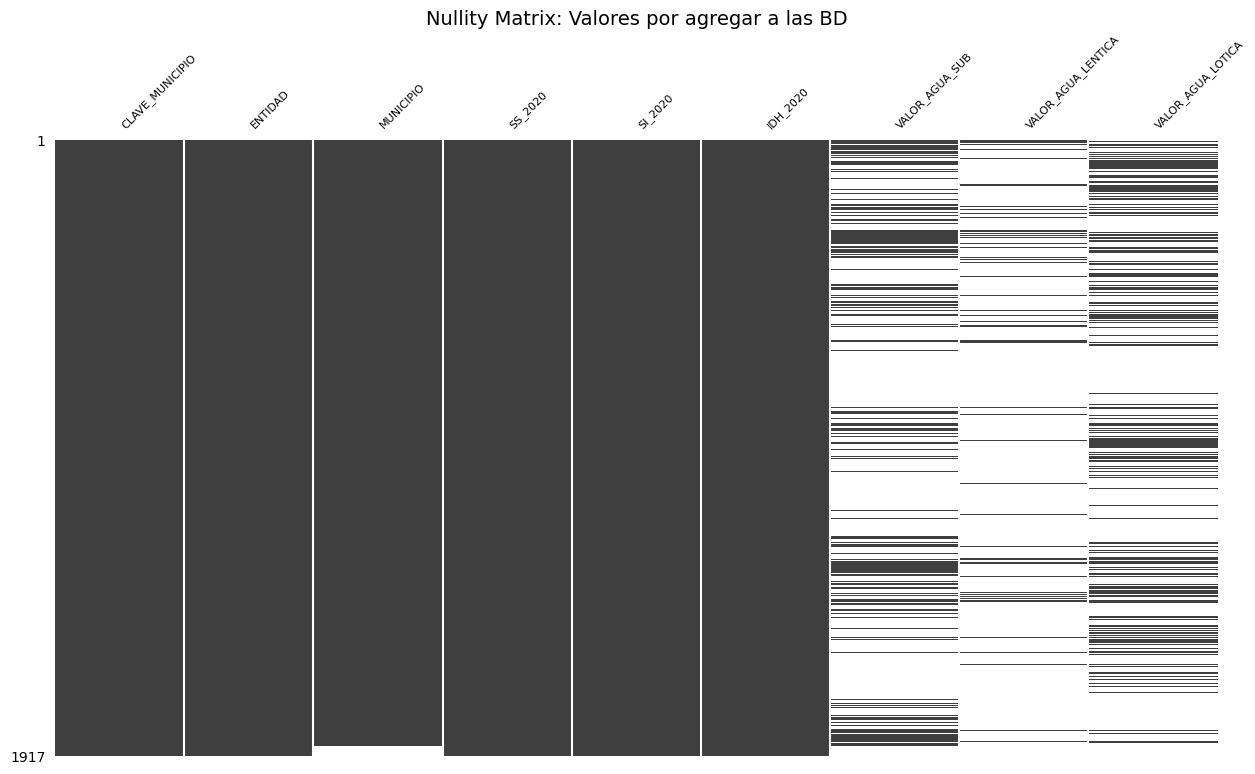

**Acciones para la imputación de datos**

Al ser un caso peculiar en la distribución, se propuso actuar de forma individual con cada estado de la república de la siguiente forma:

1.  Identificación de registros no entrantes a la base de datos con valores de índices.  
Para esto, se modificó el modo de ingreso de los valores de agua, donde para cada categoría se conservaron los registros no entrantes con una nueva función para ingresarlos a la base de datos anual de forma directa.

2.  Imputación por contigüidad geográfica.  
Para cada estado de la República, se asignan primero los valores presentes en 'VALOR_AGUA'; después, para cada municipio sin valor, se toma el valor del municipio colindante si éste tiene.
Para el caso de colidancias múltiples, se inputa el valor más frecuente.  
Los valores imputados por este método no son considerados para siguientes asignaciones de valores.
Se considera "colindancia" a compartir una frontera.

3.  Imputación conservando el ratio estatal.  
Aplicable a estados que hayan sido procesados en (1) y no procesados, se escogió un umbral de no más de 30% de datos faltantes para la selección.  
El ratio corresponde a la proporción de valores de *good* ['3'], *regular* ['2'] y *poor* ['1'] en una misma entidad.  
Los valores del semáforo se asignan aleatoriamente en el resto de municipios del estado, para obtener finalmente la misma proporción entre los 3 posibles valores.

3.  Se está considerando una tercer técnica que conserve la fiabilidad de los datos, mientras tanto, se generarán bases de datos eliminando registros con valores NaN.



Cambio en la función de asignación de valores de semáforo

In [19]:
def asignar_valor_agua(datos_agua, datos_tres_indices, nombre_columna_valor):

    # Archivo o df con los datos de calidad de agua por categoría
    if isinstance(datos_agua, str):
        df1 = pd.read_excel(datos_agua)
    else:
        df1 = datos_agua.copy()

    df1 = df1[['ESTADO', 'MUNICIPIO', 'Water quality']]

    # Reemplazar los valores de 'Water quality'
    df1['Water quality'] = df1['Water quality'].replace({
        'Good': 3,
        'Regular': 2,
        'Poor': 1
    })

    # Agrupar por Estado-municipio y seleccionar el valor más frecuente en 'Water quality'
    df1 = df1.groupby(['ESTADO', 'MUNICIPIO'])['Water quality'].agg(lambda x: x.value_counts().idxmax()).reset_index()
    df1.rename(columns={'Water quality': nombre_columna_valor}, inplace=True)

    # Archivo o df con los datos de índices
    if isinstance(datos_tres_indices, str):
        df2 = pd.read_excel(datos_tres_indices)
    else:
        df2 = datos_tres_indices.copy()


    # Normalizar nombres para comparar
    df1['ESTADO'] = df1['ESTADO'].str.lower()
    df1['MUNICIPIO'] = df1['MUNICIPIO'].str.lower()
    df2['ENTIDAD'] = df2['ENTIDAD'].str.lower()
    df2['MUNICIPIO'] = df2['MUNICIPIO'].str.lower()

    # Unir con base en las coincidencias: 'ESTADO'-'ENTIDAD' y 'MUNICIPIO'-'MUNICIPIO'
    df_resultado = pd.merge(df2, df1, how='left', left_on=['ENTIDAD', 'MUNICIPIO'], right_on=['ESTADO', 'MUNICIPIO'])

    # Obtener los registros que no encontraron coincidencias
    df_no_coincidentes = df1[~df1[['ESTADO', 'MUNICIPIO']].apply(tuple, axis=1).isin(df_resultado[['ESTADO', 'MUNICIPIO']].apply(tuple, axis=1))]

    # Eliminar las columnas innecesarias después de la combinación
    df_resultado.drop(columns=['ESTADO'], inplace=True)

    return df_resultado, df_no_coincidentes

Ejemplo de uso

In [ ]:
df_base = 'Resultados_IDH_SS_SE_SI.xlsx'
datos_subterranea = 'groundwater_edited.xlsx'
datos_lentica = 'lentic_water_quality_edited.xlsx'
datos_lotica = 'lotic_water_quality_edited.xlsx'

# Aplicar la función para agua subterránea

df_base_sub, df_no_coincidentes_sub = asignar_valor_agua(datos_subterranea, df_base, 'VALOR_AGUA_SUB')

# Aplicar la función para agua léntica

df_base_sub_len, df_no_coincidentes_lentica = asignar_valor_agua(datos_lentica, df_base_sub, 'VALOR_AGUA_LENTICA')

# Aplicar la función para agua lótica

df_base_sub_loti, df_no_coincidentes_lotica = asignar_valor_agua(datos_lotica, df_base_sub_len, 'VALOR_AGUA_LOTICA')

# Resultado: df_base_sub_loti
# Registros que no entraron: df_no_coincidentes para cada categoría

De esta forma, se encontraron datos para el siguiente número de municipios:

*  Subterránea: 157
*  Léntica: 31
*  Lótica: 118

Esto, sin embargo, representa un siguiente desafío, pues los municipios presentes en los 3 no son necesariamente los presentes en el resto. Es más, sólo 5 municipios tienen valores en las 3 categorías.

Imputación conservando ratio

In [ ]:
def imputar_valores_ratio(df):

    # Columnas a imputar

    columnas = ['VALOR_AGUA_SUB', 'VALOR_AGUA_LENTICA', 'VALOR_AGUA_LOTICA']

    for columna in columnas:

        # Calcular el porcentaje de valores faltantes por estado para la columna actual

        porcentaje_faltantes = df[columna].isna().groupby(df['ENTIDAD']).mean() * 100

        # Estados con más del 30% de valores faltantes

        estados_con_faltantes = porcentaje_faltantes[porcentaje_faltantes > 30].index

        for estado in estados_con_faltantes:

            estado_df = df[df['ENTIDAD'] == estado]

            # Contar la proporción de 1, 2, y 3 en los registros no nulos

            proporciones = estado_df[columna].value_counts(normalize=True)

            # Verificar que existan valores para calcular proporciones

            if proporciones.empty:
                continue

            # Obtener la cantidad de valores faltantes

            faltantes = estado_df[columna].isna().sum()

            # Crear una lista con la proporción adecuada de 1, 2, y 3 para rellenar los valores faltantes

            valores_imputados = np.random.choice(
                proporciones.index,
                size=faltantes,
                p=proporciones.values
            )

            # Rellenar

            df.loc[(df['ENTIDAD'] == estado) & (df[columna].isna()), columna] = valores_imputados

    return df

Ejemplo de uso

In [ ]:
df_imputado = imputar_valores_faltantes(df)

**Datos sobre componentes de agua**

Se trabajó de forma análoga a lo establecido con la parte de calidad de agua. Primero se preparó el archivo para conservar la información relevante.

*Funciones para agregar datos sorbe agua a algún otro dataframe*

In [90]:
import unicodedata

def quitar_acentos(texto):
    #if not isinstance(texto, str):
        #print(f"Tipo inesperado encontrado: {type(texto)} - Valor: {texto}")
    if isinstance(texto, str):  # Solo procesar si el valor es una cadena
        return unicodedata.normalize('NFD', texto).encode('ascii', 'ignore').decode('ascii')
    return texto  # Si no es una cadena, simplemente devolver el valor tal cual está

In [82]:
def agregar_componentes_coastal(datos_agua, datos_tres_indices):

    # Archivo de calidad de agua costera

    if isinstance(datos_agua, str):
        df1 = pd.read_excel(datos_agua)
    else:
        df1 = datos_agua.copy()

    # Archivo donde están todos los valores de índices (o df anterior)

    if isinstance(datos_tres_indices, str):
        df2 = pd.read_excel(datos_tres_indices)
    else:
        df2 = datos_tres_indices

    # Normalizar nombres para comparar

    df1['ESTADO'] = df1['ESTADO'].str.lower().apply(quitar_acentos).replace('estado de mexico', 'mexico').replace('queretaro arteaga', 'queretaro')
    df1['MUNICIPIO'] = df1['MUNICIPIO'].str.lower().apply(quitar_acentos)
    df2['ENTIDAD'] = df2['ENTIDAD'].str.lower().apply(quitar_acentos)
    df2['MUNICIPIO'] = df2['MUNICIPIO'].str.lower().apply(quitar_acentos)

    # Unir con base en las coincidencias: 'ESTADO'-'ENTIDAD' y 'MUNICIPIO'-'MUNICIPIO'

    df_resultado = pd.merge(df2, df1, how='left', left_on=['ENTIDAD', 'MUNICIPIO'], right_on=['ESTADO', 'MUNICIPIO'])

    # Obtener registros que no "entraron" en el merge

    registros_no_entraron = df1[~df1.set_index(['ESTADO', 'MUNICIPIO']).index.isin(df_resultado.set_index(['ESTADO', 'MUNICIPIO']).index)]
    registros_no_entraron.rename(columns={'ESTADO': 'ENTIDAD'}, inplace=True)

    # Eliminar los registros que no tuvieron coincidencia

    df_resultado = df_resultado.dropna(subset=['VALOR_AGUA_COAST'])

    # Eliminar las columnas innecesarias después de la combinación

    df_resultado.drop(columns=['ESTADO'], inplace=True)

    return df_resultado, registros_no_entraron

In [126]:
def agregar_componentes_sub(datos_agua, datos_tres_indices):

    # Archivo de calidad de agua subterránea

    if isinstance(datos_agua, str):
        df1 = pd.read_excel(datos_agua)
    else:
        df1 = datos_agua.copy()

    # Archivo donde están todos los valores de índices (o df anterior)

    if isinstance(datos_tres_indices, str):
        df2 = pd.read_excel(datos_tres_indices)
    else:
        df2 = datos_tres_indices

    # Normalizar nombres para comparar

    df1['ESTADO'] = df1['ESTADO'].str.lower().apply(quitar_acentos).replace('estado de mexico', 'mexico').replace('queretaro arteaga', 'queretaro')
    df1['MUNICIPIO'] = df1['MUNICIPIO'].str.lower().apply(quitar_acentos).replace('jimenez camargo', 'jimenez').replace('medellin', 'medellin de bravo').replace('aconcchi', 'aconchi')
    df1.loc[df1['ESTADO'] == 'sonora', 'MUNICIPIO'] = df1.loc[df1['ESTADO'] == 'sonora', 'MUNICIPIO'].replace('san felipe', 'san felipe de jesus')
    df1.loc[df1['ESTADO'] == 'guanajuato', 'MUNICIPIO'] = df1.loc[df1['ESTADO'] == 'guanajuato', 'MUNICIPIO'].replace('dolores hidalgo c.i.n.', 'dolores hidalgo cuna de la independencia')
    df2['ENTIDAD'] = df2['ENTIDAD'].str.lower().apply(quitar_acentos)
    df2['MUNICIPIO'] = df2['MUNICIPIO'].str.lower().apply(quitar_acentos)

    # Unir con base en las coincidencias: 'ESTADO'-'ENTIDAD' y 'MUNICIPIO'-'MUNICIPIO'

    df_resultado = pd.merge(df2, df1, how='left', left_on=['ENTIDAD', 'MUNICIPIO'], right_on=['ESTADO', 'MUNICIPIO'])

    # Obtener registros que no "entraron" en el merge

    registros_no_entraron = df1[~df1.set_index(['ESTADO', 'MUNICIPIO']).index.isin(df_resultado.set_index(['ESTADO', 'MUNICIPIO']).index)]
    registros_no_entraron.rename(columns={'ESTADO': 'ENTIDAD'}, inplace=True)

    # Eliminar los registros que no tuvieron coincidencia

    df_resultado = df_resultado.dropna(subset=['VALOR_AGUA_SUB'])

    # Eliminar las columnas innecesarias después de la combinación

    df_resultado.drop(columns=['ESTADO'], inplace=True)

    return df_resultado, registros_no_entraron

In [84]:
def agregar_componentes_lentica(datos_agua, datos_tres_indices):

    # Archivo de calidad de agua léntica

    if isinstance(datos_agua, str):
        df1 = pd.read_excel(datos_agua)
    else:
        df1 = datos_agua.copy()

    # Archivo donde están todos los valores de índices (o df anterior)

    if isinstance(datos_tres_indices, str):
        df2 = pd.read_excel(datos_tres_indices)
    else:
        df2 = datos_tres_indices

    # Normalizar nombres para comparar
    
    df1['ESTADO'] = df1['ESTADO'].str.lower().apply(quitar_acentos).replace('estado de mexico', 'mexico').replace('queretaro arteaga', 'queretaro')
    df1['MUNICIPIO'] = df1['MUNICIPIO'].str.lower().apply(quitar_acentos)
    df2['ENTIDAD'] = df2['ENTIDAD'].str.lower().apply(quitar_acentos)
    df2['MUNICIPIO'] = df2['MUNICIPIO'].str.lower().apply(quitar_acentos)

    # Unir con base en las coincidencias: 'ESTADO'-'ENTIDAD' y 'MUNICIPIO'-'MUNICIPIO'

    df_resultado = pd.merge(df2, df1, how='left', left_on=['ENTIDAD', 'MUNICIPIO'], right_on=['ESTADO', 'MUNICIPIO'])

    # Obtener registros que no "entraron" en el merge

    registros_no_entraron = df1[~df1.set_index(['ESTADO', 'MUNICIPIO']).index.isin(df_resultado.set_index(['ESTADO', 'MUNICIPIO']).index)]
    registros_no_entraron.rename(columns={'ESTADO': 'ENTIDAD'}, inplace=True)

    # Eliminar los registros que no tuvieron coincidencia

    df_resultado = df_resultado.dropna(subset=['VALOR_AGUA_LENTICA'])

    # Eliminar las columnas innecesarias después de la combinación
    
    df_resultado.drop(columns=['ESTADO'], inplace=True)

    return df_resultado, registros_no_entraron

In [85]:
def agregar_componentes_lotica(datos_agua, datos_tres_indices):

    # Archivo de calidad de agua lótica

    if isinstance(datos_agua, str):
        df1 = pd.read_excel(datos_agua)
    else:
        df1 = datos_agua.copy()

    # Archivo donde están todos los valores de índices (o df anterior)

    if isinstance(datos_tres_indices, str):
        df2 = pd.read_excel(datos_tres_indices)
    else:
        df2 = datos_tres_indices

    # Normalizar nombres para comparar

    df1['ESTADO'] = df1['ESTADO'].str.lower().apply(quitar_acentos).replace('estado de mexico', 'mexico').replace('queretaro arteaga', 'queretaro')
    df1['MUNICIPIO'] = df1['MUNICIPIO'].str.lower().apply(quitar_acentos)
    df2['ENTIDAD'] = df2['ENTIDAD'].str.lower().apply(quitar_acentos)
    df2['MUNICIPIO'] = df2['MUNICIPIO'].str.lower().apply(quitar_acentos)

    # Unir con base en las coincidencias: 'ESTADO'-'ENTIDAD' y 'MUNICIPIO'-'MUNICIPIO'

    df_resultado = pd.merge(df2, df1, how='left', left_on=['ENTIDAD', 'MUNICIPIO'], right_on=['ESTADO', 'MUNICIPIO'])

    # Obtener registros que no "entraron" en el merge

    registros_no_entraron = df1[~df1.set_index(['ESTADO', 'MUNICIPIO']).index.isin(df_resultado.set_index(['ESTADO', 'MUNICIPIO']).index)]
    registros_no_entraron.rename(columns={'ESTADO': 'ENTIDAD'}, inplace=True)

    # Eliminar los registros que no tuvieron coincidencia

    df_resultado = df_resultado.dropna(subset=['VALOR_AGUA_LOTICA'])

    # Eliminar las columnas innecesarias después de la combinación
    
    df_resultado.drop(columns=['ESTADO'], inplace=True)

    return df_resultado, registros_no_entraron

Ejemplo de uso

In [ ]:
df_base = 'Resultados_IDH_SS_SE_SI.xlsx'
datos_costera = 'coastal_complete_filtered_2018.xlsx'
datos_subterranea = 'groundwater_complete_filtered_2018.xlsx'
datos_lentica = 'lentic_complete_filtered_2018.xlsx'
datos_lotica = 'lotic_complete_filtered_2018.xlsx'

df_lotic, df_no_coincidentes_lotica = agregar_componentes_lotica(datos_lotica, df_base)
df_sub, df_no_coincidentes_subterranea = agregar_componentes_sub(datos_subterranea, df_base)
df_len, df_no_coincidentes_lentica = agregar_componentes_lentica(datos_lentica, df_base)
df_cost, df_no_coincidentes_costera = agregar_componentes_coastal(datos_costera, df_base)

**Resumen de número de municipios con información completa para cada tipo de toma de agua:**

Costera: 97 municipios (20 no entraron)   
Subterránea: 507 municipios (157 no entraron)   
Léntica: 209 municipios (32 no entraron)   
Lótica: 553 municipios (118 no entraron)   

Costera + subterránea + léntica + lótica: 10 municipios

Registros presentes en la base de datos anual: 1,435,706

Registros después de filtrar NaNs para cada tipo de toma:   
Costera: 162,574   
Subterránea: 655,273   
Léntica: 361,688   
Lótica: 716,860   

**Merge con BD anuales**

En esta sección se especifican las funciones de preparación de documentos sobre componentes en calidad de agua, derivado de la consideración de que algunos componentes tienen mayor relevancia en la calificación del semáforo.

Para este fin, no se tomará el valor más frecuente sino que se considerarán todas las instancias de los documentos *"complete"* para ingresarlas de forma aleatoria en la base de datos anual, conservando así el valor de dichos componentes para su semáforo particular.

La forma de proceder es la siguiente:   
Para *n* registros de un municipio en particular (identificado con CLAVE_RES) presentes en el documento de calidad de agua, y considerando que se encuentran *m* instancias del mismo municipio en la base de datos anual, se insertarán *k* repeticiones de *n* de forma que *kn* *=* *m*. Cada *n_i* presente en *n* ingresará de forma aleatoria hasta que todos los *m_i* tengan valores asociados.   
Además, se considera el caso especial en donde *n >= m*, donde se asegura que se tome una muestra aleatoria sin reemplazo para evitar repeticiones cuando no sea necesario.


*Coastal*

In [ ]:
# Selección de columnas de "cumplimiento"

documento_coastal = 'coastal_complete.xlsx'

df = pd.read_excel(documento_coastal, usecols=[
        'ESTADO', 'MUNICIPIO', 'AÑO', 'LATITUD', 'LONGITUD', 'complies_TSS',
        'complies_FC', 'complies_ODs', 'complies_ODm', 'complies_ODb', 'complies_FE',
        'complies_TF15s', 'complies_TF15b', 'Water quality'
    ])

# Normalizar nombres de estado y municipio

df['ESTADO'] = df['ESTADO'].str.lower()
df['MUNICIPIO'] = df['MUNICIPIO'].str.lower()

# Reemplazar calificaciones de 'Water quality' por valores

df['Water quality'] = df['Water quality'].replace({
        'Good': 3,
        'Regular': 2,
        'Poor': 1
    })

# Renombrar las columnas de cumplimiento

df.columns = [col.replace('complies', 'coast_comp') if 'complies' in col else col for col in df.columns]

# Renombrar 'Water quality' a 'VALOR_AGUA_COAST'

df.rename(columns={'Water quality': 'VALOR_AGUA_COAST'}, inplace=True)

df.shape

# Filtrar los registros del año 2018 en adelante
df = df[df['AÑO'] >= 2018]

df.shape

*Groundwater*

In [ ]:
# Selección de columnas de "cumplimiento"

documento_groundwater = 'groundwater_complete.xlsx'
df = pd.read_excel(documento_groundwater, usecols=[
        'ESTADO', 'MUNICIPIO', 'AÑO', 'LATITUD', 'LONGITUD', 'complies_Alk', 'complies_Cond',
        'complies_Hard',  'complies_TDS', 'complies_Fe', 'complies_Mn', 'complies_F',
        'complies_FC', 'complies_NO3N', 'complies_As', 'complies_Cd', 'complies_Cr',
        'complies_Hg', 'complies_Pb', 'Water quality'
    ])

# Normalizar nombres de estado y municipio

df['ESTADO'] = df['ESTADO'].str.lower()
df['MUNICIPIO'] = df['MUNICIPIO'].str.lower()

# Reemplazar calificaciones de 'Water quality' por valores

df['Water quality'] = df['Water quality'].replace({
        'Good': 3,
        'Regular': 2,
        'Poor': 1
    })

# Renombrar las columnas de cumplimiento

df.columns = [col.replace('complies', 'gw_comp') if 'complies' in col else col for col in df.columns]

# Renombrar 'Water quality' a 'VALOR_AGUA_SUB'

df.rename(columns={'Water quality': 'VALOR_AGUA_SUB'}, inplace=True)

df.shape

# Filtrar los registros del año 2018 en adelante
df = df[df['AÑO'] >= 2018]

df.shape

*Lentic*

In [ ]:
# Selección de columnas de "cumplimiento"

documento_lentic = 'lentic_complete.xlsx'
df = pd.read_excel(documento_lentic, usecols=[
        'ESTADO', 'MUNICIPIO', 'AÑO', 'LATITUD', 'LONGITUD', 'complies_TSS', 'complies_FC',
        'complies_ECOLI', 'complies_ODs', 'complies_ODm', 'complies_ODb', 'complies_BOD5',
        'complies_COD', 'complies_TD48s', 'complies_TD48b', 'complies_TF15s', 'complies_TF15b', 'Water quality'
    ])

# Normalizar nombres de estado y municipio

df['ESTADO'] = df['ESTADO'].str.lower()
df['MUNICIPIO'] = df['MUNICIPIO'].str.lower()

# Reemplazar calificaciones de 'Water quality' por valores

df['Water quality'] = df['Water quality'].replace({
        'Good': 3,
        'Regular': 2,
        'Poor': 1
    })

# Renombrar las columnas de cumplimiento

df.columns = [col.replace('complies', 'len_comp') if 'complies' in col else col for col in df.columns]

# Renombrar 'Water quality' a 'VALOR_AGUA_LENTICA'

df.rename(columns={'Water quality': 'VALOR_AGUA_LENTICA'}, inplace=True)

df.shape

# Filtrar los registros del año 2018 en adelante
df = df[df['AÑO'] >= 2018]

df.shape

*Lotic*

In [ ]:
# Selección de columnas de "cumplimiento"

documento_lotic = 'lotic_complete.xlsx'
df = pd.read_excel(documento_lotic, usecols=[
        'ESTADO', 'MUNICIPIO', 'AÑO', 'LATITUD', 'LONGITUD', 'complies_TSS',
        'complies_FC', 'complies_ECOLI', 'complies_OD', 'complies_BOD5',
        'complies_COD', 'complies_TD48', 'complies_TF15', 'Water quality'
    ])

# Normalizar nombres de estado y municipio

df['ESTADO'] = df['ESTADO'].str.lower()
df['MUNICIPIO'] = df['MUNICIPIO'].str.lower()

# Reemplazar calificaciones de 'Water quality' por valores

df['Water quality'] = df['Water quality'].replace({
        'Good': 3,
        'Regular': 2,
        'Poor': 1
    })

# Renombrar las columnas de cumplimiento

df.columns = [col.replace('complies', 'lot_comp') if 'complies' in col else col for col in df.columns]

# Renombrar 'Water quality' a 'VALOR_AGUA_LOTICA'

df.rename(columns={'Water quality': 'VALOR_AGUA_LOTICA'}, inplace=True)

df.shape

# Filtrar los registros del año 2018 en adelante
df = df[df['AÑO'] >= 2018]

df.shape

*Funciones para el merge*

In [ ]:
def asignar_clave_municipio(documento_agua, documento_indices):

    # Normalizar nombres para comparar

    documento_agua['ESTADO'] = documento_agua['ESTADO'].str.lower()
    documento_agua['MUNICIPIO'] = documento_agua['MUNICIPIO'].str.lower()
    documento_indices['ENTIDAD'] = documento_indices['ENTIDAD'].str.lower()
    documento_indices['MUNICIPIO'] = documento_indices['MUNICIPIO'].str.lower()

    # Realizar el merge basado en las columnas de Estado/Entidad y Municipio

    df_merged = pd.merge(documento_agua, documento_indices[['ENTIDAD', 'MUNICIPIO', 'CLAVE_MUNICIPIO', 'SI_2020', 'SS_2020', 'IDH_2020']],
                         left_on=['ESTADO', 'MUNICIPIO'],
                         right_on=['ENTIDAD', 'MUNICIPIO'],
                         how='left')
    
    # Eliminar registros que no tengan clave de municipio

    #df_merged = df_merged.dropna(subset=['CLAVE_MUNICIPIO'])
    df_merged.rename(columns={'CLAVE_MUNICIPIO': 'CLAVE_RES'},  inplace=True)
    
    # Eliminar la columna ESTADO

    df_merged.drop(columns=['ESTADO'], inplace=True)
    
    return df_merged

In [ ]:
def binarizar_agua(df, agua_seleccionada):

    # Extraer el prefijo adecuado (COAST, SUB, LENTICA, LOTICA)

    if 'COAST' in agua_seleccionada:
        prefijo = 'COAST'
    elif 'SUB' in agua_seleccionada:
        prefijo = 'SUB'
    elif 'LENTICA' in agua_seleccionada:
        prefijo = 'LENTICA'
    elif 'LOTICA' in agua_seleccionada:
        prefijo = 'LOTICA'
    else:
        raise ValueError("El índice seleccionado no coincide")
    
    # Crear las variables binarias para valores de semáforo

    df[f'CA_{prefijo}_MALA'] = (df[f'VALOR_AGUA_{prefijo}'] == 1).astype(int)
    df[f'CA_{prefijo}_REGULAR'] = (df[f'VALOR_AGUA_{prefijo}'] == 2).astype(int)
    df[f'CA_{prefijo}_BUENA'] = (df[f'VALOR_AGUA_{prefijo}'] == 3).astype(int)

    # Eliminar las columnas de referencia y las columnas no deseadas

    columnas_a_eliminar = [f'VALOR_AGUA_{prefijo}',
                           'SS_2020', 'SI_2020', 'IDH_2020']
    
    df.drop(columns=[col for col in columnas_a_eliminar if col in df.columns], inplace=True)

    return df

Ejemplo de uso

In [179]:
df_toadd = pd.read_excel('Resultados_indices.xlsx')
datos_costera = pd.read_excel('coastal_complete_fixed.xlsx')
datos_subterranea = pd.read_excel('groundwater_complete_fixed.xlsx')
datos_lentica = pd.read_excel('lentic_complete_fixed.xlsx')
datos_lotica = pd.read_excel('lotic_complete_fixed.xlsx')

In [24]:
df_toadd = pd.read_excel('Resultados_indices.xlsx')
datos_costera = pd.read_excel('coastal_complete_lore.xlsx')
datos_subterranea = pd.read_excel('groundwater_complete_lore.xlsx')
datos_lentica = pd.read_excel('lentic_complete_lore.xlsx')
datos_lotica = pd.read_excel('lotic_complete_lore.xlsx')

In [ ]:
lotica_claves = asignar_clave_municipio(datos_lotica, df_toadd)
lotica_claves = asignar_rangos_pnud(lotica_claves, 'IDH_2020')
lotica_claves = asignar_rangos_pnud(lotica_claves, 'SI_2020')
lotica_claves = asignar_rangos_pnud(lotica_claves, 'SS_2020')
lotica_claves = binarizar_agua(lotica_claves, 'VALOR_AGUA_LOTICA')


In [42]:
lotica_claves.to_excel('lotic_complete_index.xlsx', index=False)

In [187]:
subterranea_claves = asignar_clave_municipio(datos_subterranea, df_toadd)
subterranea_claves = binarizar_agua_general(subterranea_claves, 'VALOR_AGUA_SUB')

In [185]:
lentica_claves = asignar_clave_municipio(datos_lentica, df_toadd)
lentica_claves = binarizar_agua_general(lentica_claves, 'VALOR_AGUA_LENTICA')

In [183]:
lotica_claves = asignar_clave_municipio(datos_lotica, df_toadd)
lotica_claves = binarizar_agua_general(lotica_claves, 'VALOR_AGUA_LOTICA')

**Merge con las bases de datos anuales**

Entre las BD disponibles se encuentran unas que contienen la información sobre índices ya binarizadas (carpeta BasesConfirmados_Finales_Indices), por lo que únicamente se requieren los componentes de agua por separado

In [160]:
base_anual_2021 = pd.read_csv('BasesConfirmados_Finales_Indices//COVID_2021_LIMPIA_INDICES_PNUD_CONRES.csv')
base_anual_2022 = pd.read_csv('BasesConfirmados_Finales_Indices//COVID_2022_LIMPIA_INDICES_PNUD_CONRES.csv')
base_anual_2023 = pd.read_csv('BasesConfirmados_Finales_Indices//COVID_2023_ENE_LIMPIA_INDICES_PNUD_CONRES.csv')
doc_costera = pd.read_excel('coastal_complete_filtered_2018_CONRES.xlsx')
doc_subterranea = pd.read_excel('groundwater_complete_filtered_2018_CONRES.xlsx')
doc_lentica = pd.read_excel('lentic_complete_filtered_2018_CONRES.xlsx')
doc_lotica = pd.read_excel('lotic_complete_filtered_2018_CONRES.xlsx')

In [162]:
base_general = pd.read_csv('BasesConfirmados_Finales_Indices//COVID_GENERAL_LIMPIA_INDICES_PNUD_CONRES.csv')

In [ ]:
def merge_agua_COVID(df_grande, df_pequeno):

    # Unir con base en CLAVE_RES

    df_grande = df_grande.copy()
    df_pequeno = df_pequeno.copy()

    # Obtener los valores únicos de CLAVE_RES en la base de datos

    claves_unicas = df_grande['CLAVE_RES'].unique()

    # Inicializar un df vacío para almacenar el resultado final

    df_final = pd.DataFrame()

    # Iterar sobre cada clave única de CLAVE_RES

    for clave in claves_unicas:

        # Filtrar ambos df por CLAVE_RES actual

        registros_grande = df_grande[df_grande['CLAVE_RES'] == clave]
        registros_pequeno = df_pequeno[df_pequeno['CLAVE_RES'] == clave]

        # Si no hay registros en el df de calidad de agua para esa CLAVE_RES, continuar

        if registros_pequeno.empty:
            continue

        # Número de registros en cada df

        num_grande = len(registros_grande)
        num_pequeno = len(registros_pequeno)

        # Si hay más registros en la base anual que en el documento de agua, necesitamos repetir

        if num_grande > num_pequeno:

            # Repetir aleatoriamente los registros de calidad de agua hasta llenar en la base anual

            repeticiones = np.ceil(num_grande / num_pequeno).astype(int)  # Calcular cuántas veces necesitamos repetir
            registros_pequeno_repetidos = pd.concat([registros_pequeno] * repeticiones, ignore_index=True)

            # Mezclar aleatoriamente los registros repetidos

            registros_pequeno_repetidos = registros_pequeno_repetidos.sample(n=num_grande, replace=True).reset_index(drop=True)

        else:

            # Si hay menos o igual cantidad de registros en la base anual, tomar muestras aleatorias del df de agua
            
            registros_pequeno_repetidos = registros_pequeno.sample(n=num_grande, replace=False).reset_index(drop=True)


        # Resetear los índices de los DataFrames para hacer la asignación uno a uno

        registros_grande = registros_grande.reset_index(drop=True)   
    
        # Añadir las columnas del documento de agua a la base anual, de forma aleatoria

        registros_grande = pd.concat([registros_grande, registros_pequeno_repetidos.drop(columns='CLAVE_RES').reset_index(drop=True)], axis=1)

        # Concatenar los registros al df final

        df_final = pd.concat([df_final, registros_grande], ignore_index=True)
        

    return df_final

Ejemplo de uso

In [ ]:
doc_subterranea.drop(columns=['SE_2020', 'LATITUD', 'LONGITUD', 'AÑO'], inplace=True)
sub_general = merge_agua_COVID(base_general, doc_subterranea)
sub_general.columns

Index(['SEXO', 'TIPO_PACIENTE', 'FECHA_SINTOMAS', 'INTUBADO', 'NEUMONIA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'UCI', '0_9', '10_19', '20_29', '30_39', '40_49', '50_59',
       '60_69', '70_MAS', 'CLAVE_RES', 'IDH_VALOR', 'SS_VALOR', 'SI_VALOR',
       'IDH_BAJO', 'IDH_MEDIO', 'IDH_ALTO', 'IDH_MUY_ALTO', 'SS_BAJO',
       'SS_MEDIO', 'SS_ALTO', 'SS_MUY_ALTO', 'SI_BAJO', 'SI_MEDIO', 'SI_ALTO',
       'SI_MUY_ALTO', 'UM_IMSS', 'UM_ISSTE', 'UM_MILITAR', 'UM_PRIVADA',
       'UM_SSA', 'UM_OTRAS', 'DEFUNCION', 'gw_comp_Alk', 'gw_comp_Cond',
       'gw_comp_Hard', 'gw_comp_TDS', 'gw_comp_Fe', 'gw_comp_Mn', 'gw_comp_F',
       'gw_comp_FC', 'gw_comp_NO3N', 'gw_comp_As', 'gw_comp_Cd', 'gw_comp_Cr',
       'gw_comp_Hg', 'gw_comp_Pb', 'CA_SUB_MALA', 'CA_SUB_REGULAR',
       'CA_SUB_BUENA'],
      dtype='object')

In [ ]:
gw_anual_2021 = merge_agua_COVID(base_anual_2021, doc_lotica)
gw_anual_2022 = merge_agua_COVID(base_anual_2022, doc_lotica)
gw_anual_2023 = merge_agua_COVID(base_anual_2023, doc_lotica)

## Creación de conjuntos generales

In [ ]:
anual_2020 = pd.read_csv('RUTA')
anual_2021 = pd.read_csv('RUTA')
anual_2022 = pd.read_csv('RUTA')
anual_2023 = pd.read_csv('RUTA')

In [4]:
generales=[anual_2020, anual_2021, anual_2022, anual_2023]

concatenado = pd.concat(generales, ignore_index=True)

# Mapas

En esta sección se provee una visualización de los datos utilizados en mapas (es necesario instalar folium)

In [2]:
import folium
from folium import plugins

In [ ]:
documento_coastal = pd.read_excel('RUTA')
documento_groundwater = pd.read_excel('RUTA')
documento_lentic= pd.read_excel('RUTA')
documento_lotic = pd.read_excel('RUTA')

In [ ]:
df = documento_lotic
df = df.dropna(subset=['LATITUD', 'LONGITUD'])
df = df.drop_duplicates(subset=['LATITUD', 'LONGITUD'])

# Asignar los colores
def obtener_color(valor_agua):
    if valor_agua == 1:
        return 'firebrick' # "Poor"
    elif valor_agua == 2:
        return 'gold'   # "Regular"
    elif valor_agua == 3:
        return 'green'  # "Good"
    else:
        return 'gray' 

agrupados = df.groupby(['LATITUD', 'LONGITUD'])['VALOR_AGUA_LOTICA'].agg(lambda x: x.mode()[0] if len(x.mode()) == 1 else random.choice(x.mode())).reset_index()

mapa = folium.Map(location=[df['LATITUD'].mean(), df['LONGITUD'].mean()], zoom_start=6,
                  tiles='CartoDB positron',
                  )

# Agregar un círculo para cada registro
for index, row in agrupados.iterrows():
    color = obtener_color(row['VALOR_AGUA_LOTICA'])  # Determinar el color en función del valor de VALOR_AGUA
    folium.CircleMarker(
        location=[row['LATITUD'], row['LONGITUD']],  # Coordenadas
        radius=7,  # Tamaño del círculo
        color=color,  # Color del borde
        fill=True,  # Relleno dentro del círculo
        fill_color=color,  # Color de relleno
        fill_opacity=0.6,  # Opacidad del relleno
        popup=f"Ubicación: {row['LATITUD']}, {row['LONGITUD']}<br>Valor de agua: {row['VALOR_AGUA_LOTICA']}",
    ).add_to(mapa)

mapa
mapa.save('mapa_lot_2018_final.html')